In [1]:
from google.colab import files
uploaded = files.upload()

Saving Tesla.csv - Tesla.csv.csv to Tesla.csv - Tesla.csv (1).csv


In [7]:
# Step 1: Import Libraries
# We import the required Python libraries for data handling, visualization, and model building.

import pandas as pd

# Load dataset
df = pd.read_csv("Tesla.csv")
print(df.head())
print(df.info())

        Date       Open   High        Low      Close    Volume  Adj Close
0  6/29/2010  19.000000  25.00  17.540001  23.889999  18766300  23.889999
1  6/30/2010  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2   7/1/2010  25.000000  25.92  20.270000  21.959999   8218800  21.959999
3   7/2/2010  23.000000  23.10  18.709999  19.200001   5139800  19.200001
4   7/6/2010  20.000000  20.00  15.830000  16.110001   6866900  16.110001
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB
None


In [8]:
data = df[['Open']].values

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

In [10]:
import numpy as np

def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, 60)

In [11]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0548 - val_loss: 0.0032
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0012 - val_loss: 0.0020
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 9.0663e-04 - val_loss: 0.0016
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0010 - val_loss: 0.0024
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 9.7735e-04 - val_loss: 0.0015
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 8.7157e-04 - val_loss: 0.0020
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)

# Inverse scaling
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print("MAE:", mae)
print("RMSE:", rmse)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
MAE: 7.606750922137804
RMSE: 9.875568105123493


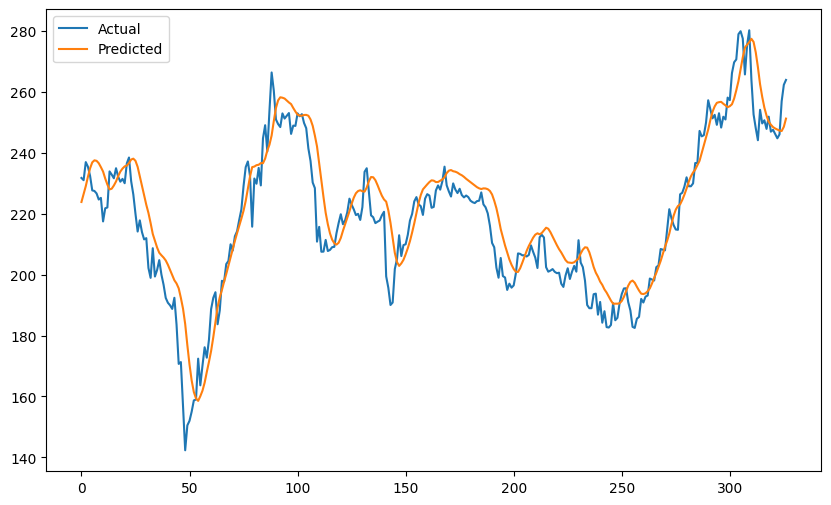

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test_inv, label="Actual")
plt.plot(y_pred_inv, label="Predicted")
plt.legend()
plt.show()